In [1]:
# from sklearn.feature_extraction.text import CountVectorizer

# v = CountVectorizer(ngram_range=(1,2))
# v.fit(['Thor the thunderstorm is looking for job'])
# v.vocabulary_

{'thor': 9,
 'the': 7,
 'thunderstorm': 11,
 'is': 2,
 'looking': 5,
 'for': 0,
 'job': 4,
 'thor the': 10,
 'the thunderstorm': 8,
 'thunderstorm is': 12,
 'is looking': 3,
 'looking for': 6,
 'for job': 1}

In [4]:

# carpus = ['Thor ate pizza' , 'Loki is tall' , 'loki is eating pizza']

In [11]:
import spacy
# from spacy.lang.en.stop_words import STOP_WORDS
nlp = spacy.load('en_core_web_sm')

def preprocess(text):
    doc = nlp(text)
    filtered_token = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_token.append(token.lemma_)
    return " ".join(filtered_token)

In [13]:
preprocess("loki is eating pizza  , ")

'loki eat pizza  '

In [6]:
carpus_preprocessed = [preprocess(text) for text in carpus]
carpus_preprocessed

['thor eat pizza', 'Loki tall', 'loki eat pizza']

In [10]:
carpus_preprocessed = []
for text in carpus:
    carpus_preprocessed.append(preprocess(text))
carpus_preprocessed

['thor eat pizza', 'Loki tall', 'loki eat pizza']

In [139]:
v = CountVectorizer(ngram_range=(1,2))
carpus_n_grams =v.fit(carpus_preprocessed)

carpus_n_grams.vocabulary_

{'thor': 7,
 'eat': 0,
 'pizza': 5,
 'thor eat': 8,
 'eat pizza': 1,
 'loki': 2,
 'tall': 6,
 'loki tall': 4,
 'loki eat': 3}

In [1]:
import pandas as pd
df = pd.read_json('News_Category_Dataset_v3.json' , lines=True)
df.head()


,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22


In [2]:
df.shape

(209527, 6)

In [3]:
df = df[df['short_description'].str.len()!=0]
df.shape

(189815, 6)

In [4]:
df.category.value_counts()

POLITICS          32441
WELLNESS          17943
ENTERTAINMENT     14774
STYLE & BEAUTY     9802
TRAVEL             9421
PARENTING          8790
FOOD & DRINK       6331
QUEER VOICES       5603
HEALTHY LIVING     5265
BUSINESS           5132
COMEDY             4642
SPORTS             4414
HOME & LIVING      4317
BLACK VOICES       4177
THE WORLDPOST      3664
WEDDINGS           3653
PARENTS            3556
DIVORCE            3426
WORLD NEWS         3297
WOMEN              3184
IMPACT             3086
CRIME              2832
MEDIA              2404
WEIRD NEWS         2316
TECH               2103
GREEN              2046
TASTE              1940
RELIGION           1879
SCIENCE            1803
MONEY              1755
STYLE              1567
ENVIRONMENT        1442
U.S. NEWS          1377
ARTS & CULTURE     1339
WORLDPOST          1242
CULTURE & ARTS     1063
FIFTY              1042
GOOD NEWS          1039
LATINO VOICES      1022
COLLEGE             921
EDUCATION           902
ARTS            

In [5]:
df.category

0         U.S. NEWS
1         U.S. NEWS
2            COMEDY
3         PARENTING
4         U.S. NEWS
            ...    
209522         TECH
209523       SPORTS
209524       SPORTS
209525       SPORTS
209526       SPORTS
Name: category, Length: 189815, dtype: object

In [6]:
len(df.category.value_counts())

42

In [7]:
min(df.category.value_counts())

863

In [8]:
# sample_min = min(df.category.value_counts())
df1 = df[df.category == "SCIENCE"]
df2 = df[df.category == "SPORTS"]
df3 = df[df.category == "CRIME"]
df4 = df[df.category == "BUSINESS"]

In [9]:
len(df1)

1803

In [10]:
sample_min = min(len(df1),len(df2) , len(df3) , len(df4))

In [11]:
df1 = df1.sample(sample_min)
df2 = df2.sample(sample_min)
df3 = df3.sample(sample_min)
df4 = df4.sample(sample_min)

In [12]:
len(df3)

1803

In [13]:
df_balanced = pd.concat([df1,df2,df3,df4] , axis=0)
df_balanced

,link,headline,category,short_description,authors,date
158377,https://www.huffingtonpost.com/entry/squid-oct...,"Squid, Octopus Color Change Ability Tied to 'S...",SCIENCE,This shows the diffusion of the neurotransmitt...,Jacqueline Howard,2013-07-28
27993,https://www.huffingtonpost.com/entry/pig-organ...,Scientists Hit Breakthrough In Quest To Transp...,SCIENCE,These little piggies could soon save millions ...,Ryan Grenoble,2017-08-10
141884,https://www.huffingtonpost.com/entry/king-alfr...,King Alfred The Great's Pelvic Bone May Have B...,SCIENCE,Radiocarbon tests showed that it dates between...,"LiveScience, LiveScience",2014-01-19
187370,https://www.huffingtonpost.com/entry/single-ge...,'Single Gene May Hold Key to Life Itself',SCIENCE,Distortions and sensationalism really only exp...,"Nathaniel Comfort, Contributor\nAssociate prof...",2012-09-23
187371,https://www.huffingtonpost.com/entry/ig-nobel-...,"Ig Nobel Prizes Go To Ponytail Physics, Explod...",SCIENCE,"ScienceNOW, the daily online news service of t...",Melissa Cronin,2012-09-23
...,...,...,...,...,...,...
189282,https://www.huffingtonpost.comhttp://www.nytim...,Ex-BP CEO Gets His Life Back,BUSINESS,IF there's a public villain of the Gulf of Mex...,,2012-09-03
78196,https://www.huffingtonpost.com/entry/the-secre...,The Secret To Being Happy And Loving Your Job,BUSINESS,There is no way to happiness; happiness is the...,Jo Confino,2016-01-13
27067,https://www.huffingtonpost.com/entry/how-do-yo...,How Do You Know You Have A Good Consumer Lawye...,BUSINESS,Diana Winkler suspected she'd found a great la...,"Christopher Elliott, ContributorAuthor, How to...",2017-08-21
108701,https://www.huffingtonpost.com/entry/32-effect...,32 Effective Formats to Package Your Systems,BUSINESS,Have you ever been frustrated that your staff ...,"David Finkel, ContributorBest-selling author a...",2015-01-30


In [14]:
df_balanced['category_num'] = df_balanced.category.map({
    'SCIENCE':1 , 'SPORTS':2 ,'CRIME':3 , 'BUSINESS':4
    })
df_balanced.head()

,link,headline,category,short_description,authors,date,category_num
158377,https://www.huffingtonpost.com/entry/squid-oct...,"Squid, Octopus Color Change Ability Tied to 'S...",SCIENCE,This shows the diffusion of the neurotransmitt...,Jacqueline Howard,2013-07-28,1
27993,https://www.huffingtonpost.com/entry/pig-organ...,Scientists Hit Breakthrough In Quest To Transp...,SCIENCE,These little piggies could soon save millions ...,Ryan Grenoble,2017-08-10,1
141884,https://www.huffingtonpost.com/entry/king-alfr...,King Alfred The Great's Pelvic Bone May Have B...,SCIENCE,Radiocarbon tests showed that it dates between...,"LiveScience, LiveScience",2014-01-19,1
187370,https://www.huffingtonpost.com/entry/single-ge...,'Single Gene May Hold Key to Life Itself',SCIENCE,Distortions and sensationalism really only exp...,"Nathaniel Comfort, Contributor\nAssociate prof...",2012-09-23,1
187371,https://www.huffingtonpost.com/entry/ig-nobel-...,"Ig Nobel Prizes Go To Ponytail Physics, Explod...",SCIENCE,"ScienceNOW, the daily online news service of t...",Melissa Cronin,2012-09-23,1


In [15]:
from sklearn.model_selection import train_test_split
# x= df_balanced['short_description']

X_train, X_test , y_train ,y_test = train_test_split( df_balanced['short_description'], df_balanced.category_num ,
                                                      test_size=0.2 , stratify=df_balanced.category_num)

#stratify pick equal number of data from each class 

In [16]:
X_train

124194    The old saying, "Let 'em eat cake," was a bett...
124178    A recent study suggests that cinnamon may be g...
114197    When an SUV slammed into musher Karin Hendrick...
79645     The Broncos quarterback fires back at claims t...
101338    Bridget is a project manager for a tech compan...
                                ...                        
104309    Here are some qualifications for unusual board...
79879     Giving, gratitude and all that sugar can make ...
19049     Social science points to a few ways that peopl...
186768    The messages, released Friday upon request by ...
14674                                                 Oops.
Name: short_description, Length: 5769, dtype: object

In [17]:
y_train


124194    2
124178    1
114197    2
79645     2
101338    4
         ..
104309    4
79879     1
19049     4
186768    3
14674     2
Name: category_num, Length: 5769, dtype: int64

In [18]:
# v = CountVectorizer()
# X_train = v.fit_transform(X_train)
# X_train.vacabulary_

In [29]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report
model = Pipeline([
    ('vectorizer_bow' , CountVectorizer()),('Multi Nb' , MultinomialNB())
])
model.fit(X_train,y_train)
model.score(X_test,y_test)
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.85      0.70      0.77       361
           2       0.83      0.65      0.73       360
           3       0.77      0.75      0.76       361
           4       0.59      0.84      0.69       361

    accuracy                           0.74      1443
   macro avg       0.76      0.74      0.74      1443
weighted avg       0.76      0.74      0.74      1443



In [32]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report
model = Pipeline([
    ('vectorizer_bow' , CountVectorizer(ngram_range=(1,2)) ),('Multi Nb' , MultinomialNB())
])
model.fit(X_train,y_train)
model.score(X_test,y_test)
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.66      0.53      0.59       361
           2       0.66      0.55      0.60       360
           3       0.72      0.71      0.72       361
           4       0.51      0.71      0.60       361

    accuracy                           0.63      1443
   macro avg       0.64      0.63      0.63      1443
weighted avg       0.64      0.63      0.63      1443



NOW USE PREPROCESSOR

In [35]:
df_balanced['preprocess_txt'] = df_balanced['short_description'].apply(preprocess)

In [36]:
df_balanced.head()

,link,headline,category,short_description,authors,date,category_num,preprocess_txt
158377,https://www.huffingtonpost.com/entry/squid-oct...,"Squid, Octopus Color Change Ability Tied to 'S...",SCIENCE,This shows the diffusion of the neurotransmitt...,Jacqueline Howard,2013-07-28,1,show diffusion neurotransmitter apply squid sk...
27993,https://www.huffingtonpost.com/entry/pig-organ...,Scientists Hit Breakthrough In Quest To Transp...,SCIENCE,These little piggies could soon save millions ...,Ryan Grenoble,2017-08-10,1,little piggy soon save million life
141884,https://www.huffingtonpost.com/entry/king-alfr...,King Alfred The Great's Pelvic Bone May Have B...,SCIENCE,Radiocarbon tests showed that it dates between...,"LiveScience, LiveScience",2014-01-19,1,radiocarbon test show date year 895 1017 skele...
187370,https://www.huffingtonpost.com/entry/single-ge...,'Single Gene May Hold Key to Life Itself',SCIENCE,Distortions and sensationalism really only exp...,"Nathaniel Comfort, Contributor\nAssociate prof...",2012-09-23,1,distortion sensationalism explain deterministi...
187371,https://www.huffingtonpost.com/entry/ig-nobel-...,"Ig Nobel Prizes Go To Ponytail Physics, Explod...",SCIENCE,"ScienceNOW, the daily online news service of t...",Melissa Cronin,2012-09-23,1,ScienceNOW daily online news service journal S...


In [37]:
from sklearn.model_selection import train_test_split
# x= df_balanced['short_description']

X_train, X_test , y_train ,y_test = train_test_split( df_balanced['preprocess_txt'], df_balanced.category_num ,
                                                      test_size=0.2 , stratify=df_balanced.category_num)

#stratify pick equal number of data from each class 

In [38]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report
model = Pipeline([
    ('vectorizer_bow' , CountVectorizer() ),('Multi Nb' , MultinomialNB())
])
model.fit(X_train,y_train)
model.score(X_test,y_test)
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.79      0.73      0.76       361
           2       0.79      0.66      0.72       360
           3       0.77      0.81      0.79       361
           4       0.67      0.80      0.73       361

    accuracy                           0.75      1443
   macro avg       0.76      0.75      0.75      1443
weighted avg       0.76      0.75      0.75      1443



In [39]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report
model = Pipeline([
    ('vectorizer_bow' , CountVectorizer(ngram_range=(1,2)) ),('Multi Nb' , MultinomialNB())
])
model.fit(X_train,y_train)
model.score(X_test,y_test)
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.82      0.73      0.77       361
           2       0.83      0.64      0.72       360
           3       0.78      0.81      0.80       361
           4       0.64      0.84      0.73       361

    accuracy                           0.75      1443
   macro avg       0.77      0.75      0.75      1443
weighted avg       0.77      0.75      0.75      1443



In [41]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[263,  22,  14,  62],
       [ 27, 230,  41,  62],
       [ 13,  13, 291,  44],
       [ 18,  13,  25, 305]], dtype=int64)

Text(50.722222222222214, 0.5, 'truth')

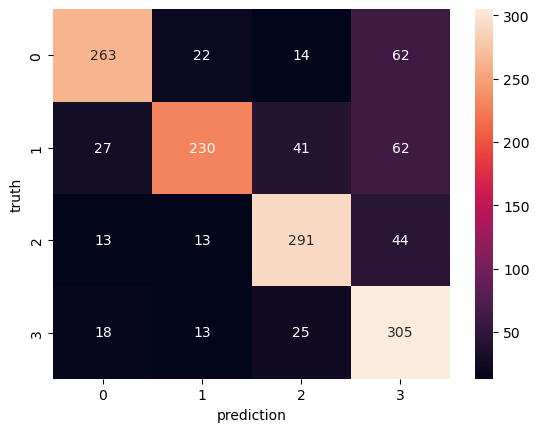

In [46]:
import seaborn as sn
import matplotlib.pyplot as plt 
sn.heatmap(cm,annot=True , fmt ='d')
plt.xlabel('prediction')
plt.ylabel('truth')